In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [608]:
df = pd.read_csv("CarPrice_Assignment.csv", index_col=0)
df = df.reset_index()
df=df.drop(["car_ID","CarName"], axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [609]:
df.iloc[:,3].value_counts()
df=df.replace(["std", "turbo"], [0,1])

In [610]:
df.iloc[:,1].value_counts()
df=df.replace(["gas", "diesel"], [0,1])

In [611]:
df.iloc[:,4].value_counts()
df=df.replace(["sedan", "hatchback", "wagon","hardtop", "convertible"], [0,1,2,3,4])

In [612]:
df.iloc[:,5].value_counts()
df=df.replace(["fwd", "rwd","4wd"], [0,1,2])

In [613]:
df.iloc[:,6].value_counts()
df=df.replace(["front", "rear"], [0,1])

In [614]:
df.iloc[:,12].value_counts()
df=df.replace(["ohc", "ohcf","ohcv","dohc","l","rotor", "dohc"], [0,1,2,3,4,5,6])

In [615]:
df.iloc[:,13].value_counts()
df=df.replace(["four", "six","five","eight","two","three", "twelve"], [4,6,5,8,2,3,12])

In [616]:
df.iloc[:,15].value_counts()
df=df.replace(["mpfi","2bbl","idi","1bbl","spdi","4bbl","mfi","spfi"], [0,1,2,3,4,5,6,7])

In [617]:
df.iloc[:,12].value_counts()
df=df.replace(["ohc", "ohcf","ohcv","dohc","l","rotor", "dohc", "dohcv"], [0,1,2,3,4,5,6,7])

In [618]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [619]:
calc_VIF(df)

,variables,VIF
0,symboling,4.248172
1,fueltype,101.447630
2,aspiration,4.210223
3,doornumber,28.336629
4,carbody,2.747581
5,drivewheel,3.703222
6,enginelocation,2.046756
7,wheelbase,2830.351887
8,carlength,2342.929482
9,carwidth,4359.618948


In [620]:
df["mpgavg"]=(df["highwaympg"]-df["citympg"])
df = df.drop(["highwaympg","citympg"], axis=1)
df["carvolbyweight"] = df["carlength"]*df["carwidth"]*df["carheight"]/((df["curbweight"]*df["wheelbase"]))
df = df.drop(["carlength", "carwidth", "carheight", "curbweight", "wheelbase"], axis=1)
df["enginesizebyborecompressionratio"]=df["compressionratio"]/df["boreratio"]
df = df.drop(["compressionratio", "boreratio"], axis=1)


In [621]:
calc_VIF(df)

,variables,VIF
0,symboling,3.278136
1,fueltype,43.127254
2,aspiration,3.238838
3,doornumber,20.852302
4,carbody,2.241861
5,drivewheel,2.589921
6,enginelocation,1.653773
7,enginetype,2.015783
8,cylindernumber,140.022759
9,enginesize,196.225473


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   symboling                         205 non-null    int64  
 1   fueltype                          205 non-null    int64  
 2   aspiration                        205 non-null    int64  
 3   doornumber                        205 non-null    int64  
 4   carbody                           205 non-null    int64  
 5   drivewheel                        205 non-null    int64  
 6   enginelocation                    205 non-null    int64  
 7   enginetype                        205 non-null    int64  
 8   cylindernumber                    205 non-null    int64  
 9   enginesize                        205 non-null    int64  
 10  fuelsystem                        205 non-null    int64  
 11  stroke                            205 non-null    float64
 12  horsepow

In [623]:
X = df.values[:, 0:-1]
y = df.values[:, -1]  
m = len(y)

In [624]:
print('x =', X[0], ', y =', y[0])

x = [3.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
 4.00000000e+00 1.00000000e+00 0.00000000e+00 6.00000000e+00
 4.00000000e+00 1.30000000e+02 0.00000000e+00 2.68000000e+00
 1.11000000e+02 5.00000000e+03 1.34950000e+04 6.00000000e+00
 2.33892959e+00] , y = 2.593659942363112


In [625]:
#normalizing data
mean = np.mean(X, axis = 0)  
deviation = np.std(X, axis= 0, ddof = 1)
X = (X - mean)/deviation

In [626]:
print('x =', X[0], ', y =', y[0])

x = [ 1.73921287 -0.32799505 -0.4681493  -1.12762792  3.20955297  0.93171326
 -0.12156907  2.80979057 -0.35202524  0.07426712 -0.75819308 -1.83488557
  0.17405669 -0.26231807  0.02732425  0.28493077 -0.48085781] , y = 2.593659942363112


In [634]:
print('x =', X[0], ', y =', y[0])
XDF = pd.DataFrame(X)
calc_VIF(XDF)

x = [ 1.73921287 -0.32799505 -0.4681493  -1.12762792  3.20955297  0.93171326
 -0.12156907  2.80979057 -0.35202524  0.07426712 -0.75819308 -1.83488557
  0.17405669 -0.26231807  0.02732425  0.28493077 -0.48085781] , y = 2.593659942363112


,variables,VIF
0,0,2.205015
1,1,2.349055
2,2,2.556975
3,3,2.113108
4,4,1.417010
5,5,2.192177
6,6,1.715442
7,7,1.637389
8,8,5.377075
9,9,19.373186


In [628]:
def costfunc(X, y, theta):
    #X -> data of all training set
    #Y -> the price for all cars
    #theta -> weights
    h_X = X.dot(theta)
    errors = np.subtract(h_X, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J


In [629]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        h_X = X.dot(theta)
        cost_ = (1/m)*(X.T@(h_X - y))
        theta = theta - (alpha)*cost_

        cost_history[i] = costfunc(X, y, theta)  
    #theta is the 1D array of fitting parameters/weights
    return theta, cost_history

In [630]:
theta = np.zeros(17)
iterations = 400
alpha = 0.06

In [631]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [ 4.43742507e-02  1.28318949e+00 -1.07274611e-01 -1.80106717e-02
 -1.19567026e-02 -2.16886264e-02 -1.36719818e-02  1.26063571e-04
  3.10875964e-01 -2.93692640e-01 -1.58443678e-02  1.70264378e-02
 -9.44486545e-02  9.61859528e-02  1.70176010e-02  9.07229238e-03
  6.99524001e-02]
First 5 values from cost_history = [5.3324303  5.24263401 5.17222357 5.11616133 5.07084442]
Last 5 values from cost_history = [4.72381749 4.72381412 4.72381077 4.72380744 4.72380412]


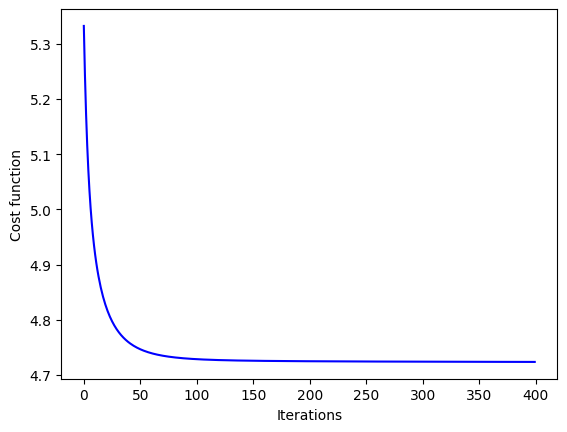

In [632]:
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.plot(range(0, iterations), cost_history, color ='blue')